<a href="https://colab.research.google.com/github/August-murr/Data_science_Demonstration/blob/main/Exploratory_Data_Analysis_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**
The objective of this data analysis is to demonstrate the process of cleaning, preprocessing, and analyzing a dataset to gain insights into the factors influencing the number of streams a song receives. We will explore various features, perform exploratory data analysis (EDA), and build a linear regression model to predict song streams. While this dataset represents the 950 most streamed songs, this analysis aims to showcase the data preprocessing steps and the creation of predictive models. In a real-world scenario, with a larger and more diverse dataset, similar approaches could be used to estimate the expected number of streams for songs and identify key features contributing to a song's success.

here's the link to the kaggle dataset:
[Most Streamed Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

Most of the code and comment in this notebook was written or rewritten with the help of **Chatgpt**.

## **Table of content**
[Getting Data From Kaggle](#getting)
## Answering Question with the data

*   [Which songs have received the highest number of streams in 2023 up to this point?](#highest)
*   [Which artists garnered the highest number of streams in the year 2023?](#artist)

*   [During which months or days of the week do songs tend to receive higher stream counts?](#months)
*   [Is there any observable impact of the song's key on the number of streams it receives?](#key)
*   [Does there exist a correlation between the tempo (BPM) of a song and the number of streams it receives?](#bpm)

## Machine Learning
*   [Machine Learning Model](#ml)
*   [Identifying Duplicate Records](#duplicated)
*   [Handling Missing Values](#missing)
*   [Handling Outliers](#outlier)
*   [Feature Selection](#selection)
*   [Multicollinearity](#multi)
*   [Feature Engineering](#engineer)
*   [Feature Encoding](#encode)
*   [Splitting the Data](#split)
*   [Feature Scaling](#scale)
*   [Linear Regression and Evaluation](#lr)
*   [Predicting Expected Streams Over Time](#predict)


## [Conclusion](#conclusion)





<a name="getting"></a>
## Getting Data from Kaggle

In [1]:
# Import the necessary library to upload files in Google Colab.
from google.colab import files

In [2]:
# Upload your Kaggle API JSON file containing your credentials.
# This file is used for authentication when accessing Kaggle datasets.
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"valerielucro","key":"de076df2b798cffcc2285f890f00c31a"}'}

In [3]:
# Remove any existing Kaggle configuration directory if it exists.
!rm -r ~/.kaggle

# Create a new directory for the Kaggle configuration files.
!mkdir ~/.kaggle

# Move the uploaded Kaggle JSON file to the newly created directory.
!mv ./kaggle.json ~/.kaggle/

# Set appropriate permissions to the Kaggle JSON file for security.
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [4]:
# Use the Kaggle API to download a specific dataset by its dataset ID.
# In this case, we're downloading the "top-spotify-songs-2023" dataset.
!kaggle datasets download -d nelgiriyewithana/top-spotify-songs-2023

  0% 0.00/47.1k [00:00<?, ?B/s]
100% 47.1k/47.1k [00:00<00:00, 35.7MB/s]


In [5]:
# Unzip the downloaded dataset file.
!unzip top-spotify-songs-2023.zip

Archive:  top-spotify-songs-2023.zip
  inflating: spotify-2023.csv        


In [6]:
# Import some of the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
# Read the dataset using Pandas, specifying the encoding as 'latin-1' to resolve encoding issues.
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Note: The 'encoding' parameter is added to handle encoding issues found during file reading,
# as a solution found on Stack Overflow.

In [8]:
# Display the first few rows of the dataset to get an initial overview.
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [9]:
# Provide an overview of the dataset, including its structure and data types.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

<a name="highest"></a>
## Which songs have received the highest number of streams in 2023 up to this point?

In [10]:
# Convert the 'streams' column from strings to integers to work with stream counts numerically.
df['streams'] = df['streams'].astype(int)

ValueError: ignored

It appears that one of the entries in the 'streams' column may be corrupted or incorrectly inputted. Let's locate and remove this problematic entry.

In [11]:
problematic_index = df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index
df.drop(problematic_index, inplace=True)

In [12]:
# Reattempt the conversion from strings to integers after data cleaning.
df['streams'] = df['streams'].astype(int)

In [13]:
# Filter the dataset to retain only songs released in the year 2023.
songs_2023 = df[df['released_year'] == 2023]

In [14]:
# Find the top 10 most streamed songs of 2023.
top_songs_2023 = songs_2023.nlargest(10, 'streams')

In [15]:
# Sort the DataFrame in ascending order of stream counts
top_songs_2023 = top_songs_2023.sort_values(by='streams')

In [16]:
# Extract song names and stream counts for visualization.
song_names = top_songs_2023['track_name']
stream_counts = top_songs_2023['streams']

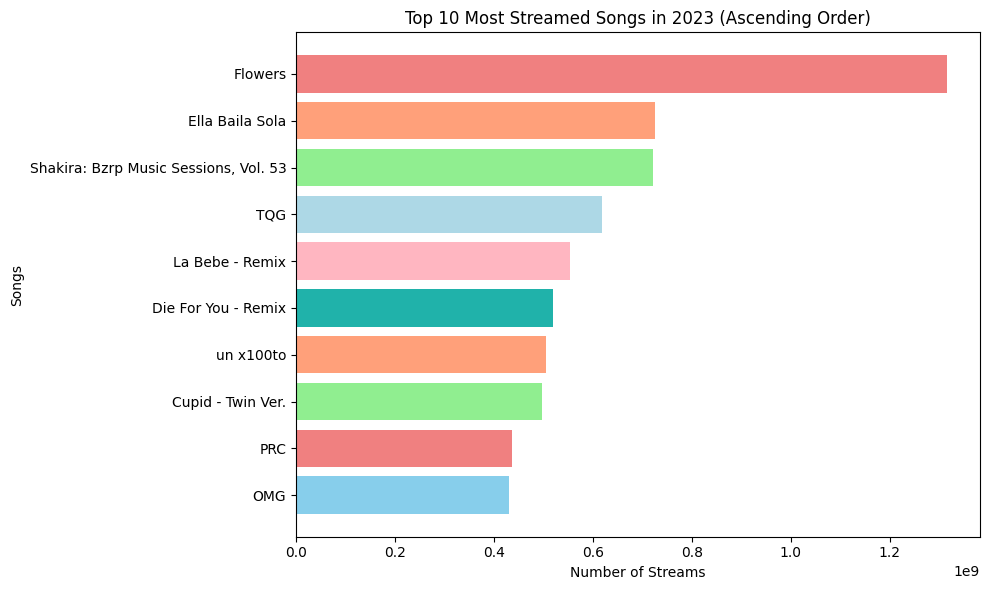

In [17]:
# Create a horizontal bar chart with colorful bars to visualize the top 10 most streamed songs in 2023.
plt.figure(figsize=(10, 6))  # Optional: adjust figure size
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightblue', 'lightgreen', 'lightsalmon', 'lightcoral']
plt.barh(song_names, stream_counts, color=colors)
plt.ylabel('Songs')
plt.xlabel('Number of Streams')
plt.title('Top 10 Most Streamed Songs in 2023 (Ascending Order)')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

<a name="artist"></a>
## Which artists garnered the highest number of streams in the year 2023?

In [18]:
# Create a list to store unique artist names
unique_artists = []

# Create a dictionary to store artist names and their corresponding stream counts
artist_streams_dict = {}

# Iterate through the songs released in 2023 and calculate stream counts for each artist.
for index, row in songs_2023.iterrows():
    artists = row['artist(s)_name'].split(', ')  # Separate artist names by ', '
    streams = row['streams']
    for artist in artists:
        artist = artist.strip()  # Remove leading/trailing spaces
        if artist not in unique_artists:
            unique_artists.append(artist)
            artist_streams_dict[artist] = streams
        else:
            artist_streams_dict[artist] += streams

In [19]:
# Create a new DataFrame from the artist_streams_dict dictionary.
artist_streams_df = pd.DataFrame({'artist_names': list(artist_streams_dict.keys()),
                                  'streams': list(artist_streams_dict.values())})

In [20]:
# Sort the new DataFrame by streams in descending order to find the top streamed artists.
artist_streams_df = artist_streams_df.sort_values(by='streams', ascending=False)

In [21]:
# Display the top 5 most streamed artists in 2023.
artist_streams_df.head()

,artist_names,streams
8,Peso Pluma,2860506771
34,Shakira,1464090067
33,Karol G,1354836810
14,Miley Cyrus,1316855716
4,Bad Bunny,1270236539


I had reservations about the results, particularly the claim that 'Peso Pluma' had accumulated 2.8 billion streams. To address this, I conducted a manual examination of his songs to investigate the possibility of any duplicates.

In [22]:
# Filter the DataFrame to include rows where "Peso Pluma" is in the artist names.
songs_with_peso_pluma = songs_2023[songs_2023['artist(s)_name'].str.contains('Peso Pluma', case=False)]

# Display the songs associated with "Peso Pluma" to ensure data integrity.
songs_with_peso_pluma

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33
20,LADY GAGA,"Gabito Ballesteros, Junior H, Peso Pluma",3,2023,6,22,332,26,86444842,11,...,140,F,Minor,65,87,74,22,0,42,4
23,"Peso Pluma: Bzrp Music Sessions, Vol. 55","Bizarrap, Peso Pluma",2,2023,5,31,1313,40,200647221,17,...,133,F,Minor,85,81,67,26,0,12,5
31,TULUM,"Peso Pluma, Grupo Frontera",2,2023,6,28,266,34,52294266,20,...,168,F#,Major,56,63,87,39,0,11,5
40,El Azul,"Junior H, Peso Pluma",2,2023,2,10,692,25,354495408,10,...,144,A,Minor,56,84,65,23,0,10,6
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388,17,...,97,NaN,Major,79,92,89,5,0,6,5
151,Bye,Peso Pluma,1,2023,5,26,324,14,95053634,13,...,122,NaN,Major,78,70,81,57,0,10,5
160,PRC,"Natanael Cano, Peso Pluma",2,2023,1,23,961,26,436027885,19,...,138,G,Minor,78,89,83,10,0,12,5


No duplicates or abnormal data inputs have been identified in the dataset. However, it's essential to consider that the list of the most streamed artists in 2023 is based solely on songs released within that year. Many artists may have garnered significantly more streams from their music released before 2023. Unfortunately, this dataset lacks the necessary information to calculate the total stream count for each artist, encompassing all of their songs, regardless of their release date.

In [23]:
# Extract the top 5 most streamed artists and their stream counts for visualization.
artist_names = artist_streams_df['artist_names'][:5]  # Top 5 artists
stream_counts = artist_streams_df['streams'][:5]  # Top 5 stream counts

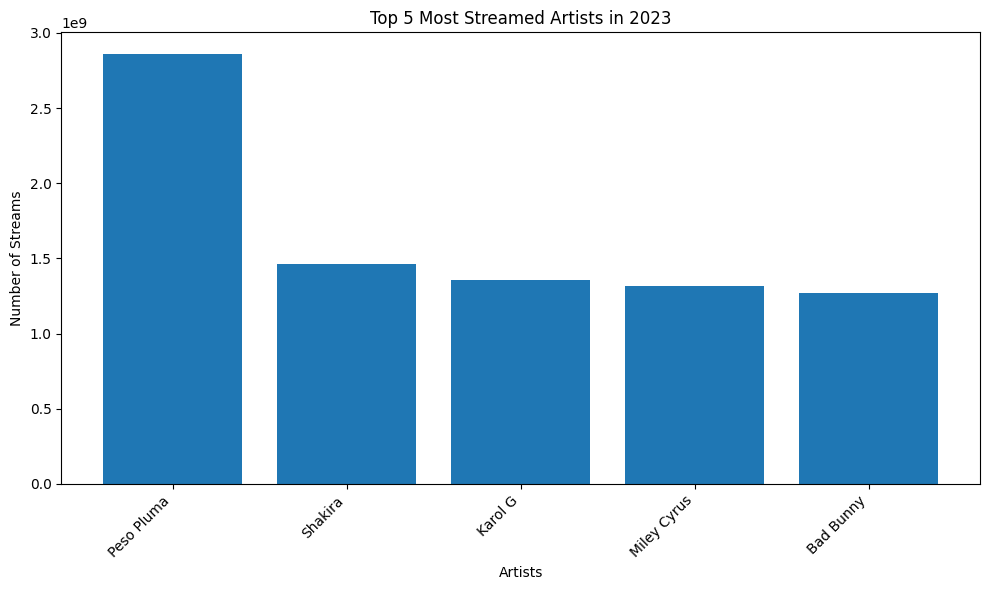

In [24]:
# Create a bar chart to visualize the top 5 most streamed artists in 2023.
plt.figure(figsize=(10, 6))  # Optional: adjust figure size
plt.bar(artist_names, stream_counts)
plt.xlabel('Artists')
plt.ylabel('Number of Streams')
plt.title('Top 5 Most Streamed Artists in 2023')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

### Is there a noticeable increase in the number of streams for songs that feature multiple artists?

In [25]:
# Group the dataset by 'artist_count' and calculate the average stream count for each group.
average_streams_by_artist_count = df.groupby('artist_count')['streams'].mean()

In [26]:
# Define the colors for the bars in the plot.
bar_colors = ['blue'] + ['green'] * 7

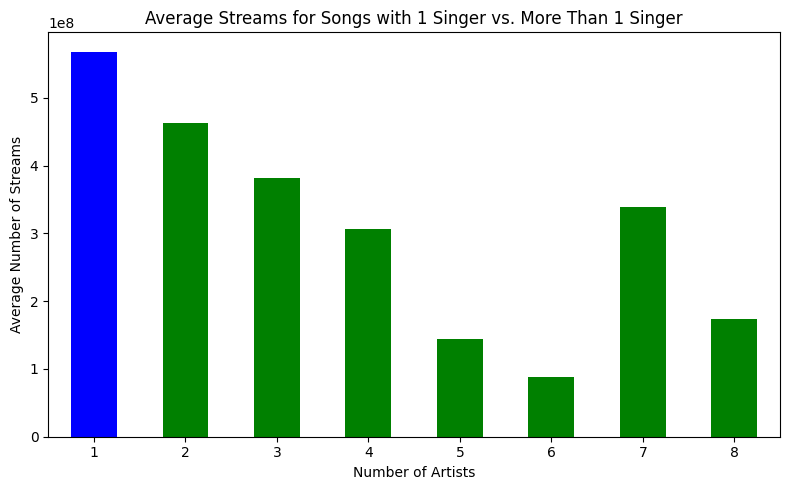

In [27]:
# Create a bar chart to visualize the relationship between the number of artists and average stream count.
plt.figure(figsize=(8, 5))  # Optional: adjust figure size
average_streams_by_artist_count.plot(kind='bar', color=bar_colors)
plt.xlabel('Number of Artists')
plt.ylabel('Average Number of Streams')
plt.title('Average Streams for Songs with 1 Singer vs. More Than 1 Singer')
plt.xticks(rotation=0)  # Keep x-axis labels upright
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

Clearly, as the number of artists on a song increases, the average number of streams decreases. However, despite this trend, featuring multiple artists on songs remains a prevalent and effective marketing strategy in the music industry.

### One Hit Wonders

Many artists experience a meteoric rise with a single chart-topping hit, only to struggle to maintain their success or produce another acclaimed piece of music or album. Let's identify some of these cases.

Ideally, we would have used the Coefficient of Variation (CV) to measure the variability in an artist's stream counts. However, due to the dataset's limitation of approximately 950 songs, this analytical approach becomes less meaningful, as it excludes less successful songs from the analysis. Instead, we will calculate the average stream count for each artist.

In [28]:
# Split songs with multiple artists into separate rows for analysis.
df['artist(s)_name'] = df['artist(s)_name'].str.split(', ')
df = df.explode('artist(s)_name')

In [29]:
# Group the data by artist and calculate the average stream count for each artist.
artist_avg_stream = df.groupby('artist(s)_name')['streams'].mean()

In [30]:
# Identify and visualize the top 10 artists with the highest average stream counts.
top_10_artists = artist_avg_stream.sort_values(ascending=False).head(10)

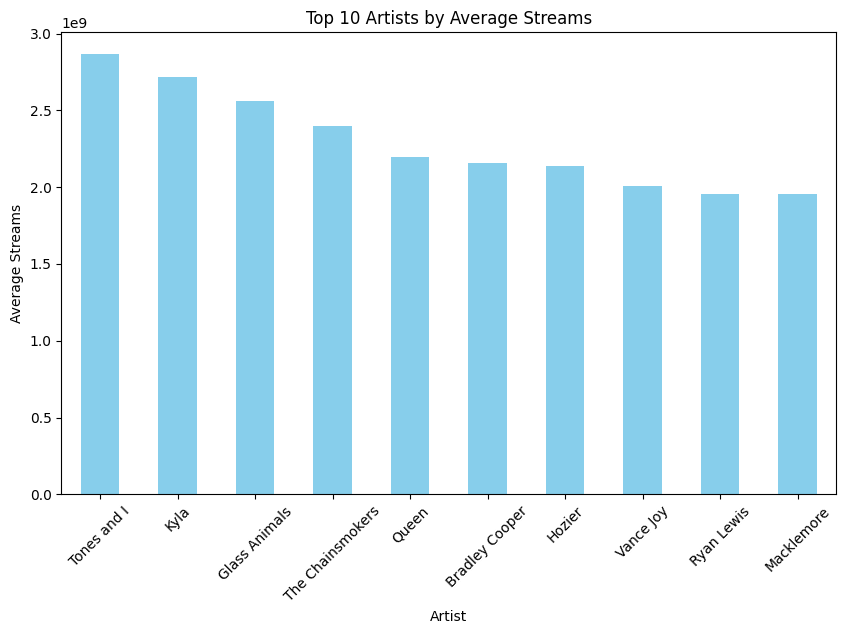

In [31]:
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Average Streams')
plt.title('Top 10 Artists by Average Streams')
plt.xticks(rotation=45)
plt.show()

While Queen certainly doesn't fit the category of a 'one-hit wonder,' it's widely accepted among music enthusiasts that artists like 'Tones and I,' 'Bradley Cooper,' and 'Macklemore and Ryan Lewis' are often considered one-hit wonders.

### what is the correlation between danceability,valence,energy with the amount of streams each song got?

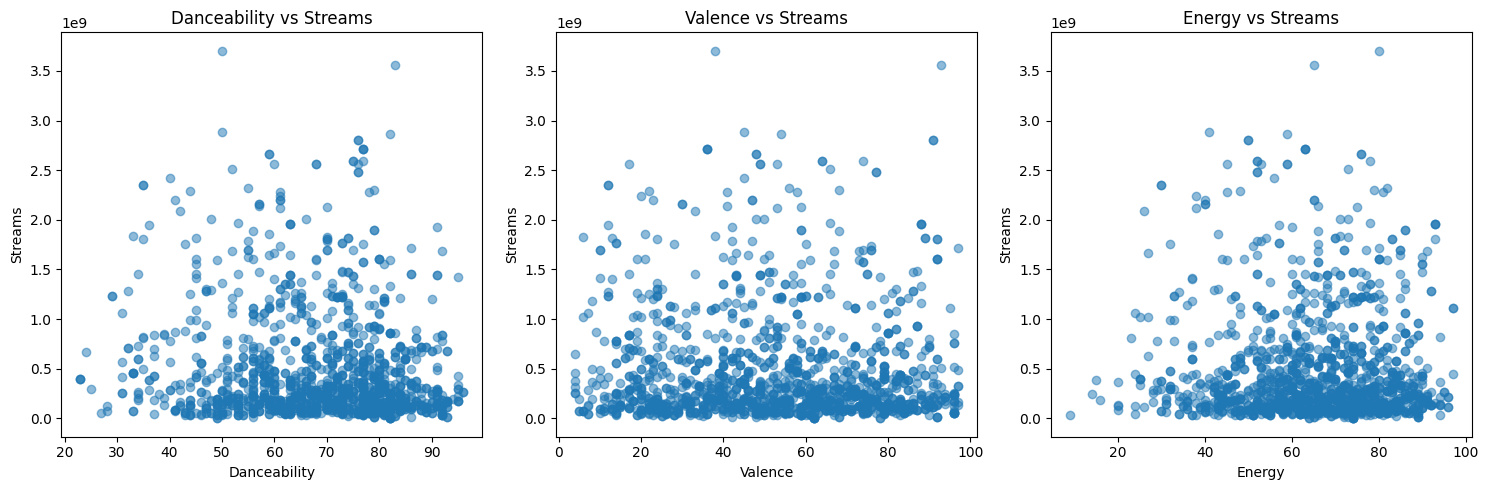

In [32]:
# Create scatter plots to visualize the correlation between danceability, valence, energy, and streams.
plt.figure(figsize=(15, 5))  # Adjusting figure size

# Danceability vs Streams
plt.subplot(1, 3, 1)
plt.scatter(df['danceability_%'], df['streams'], alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Streams')
plt.title('Danceability vs Streams')

# Valence vs Streams
plt.subplot(1, 3, 2)
plt.scatter(df['valence_%'], df['streams'], alpha=0.5)
plt.xlabel('Valence')
plt.ylabel('Streams')
plt.title('Valence vs Streams')

# Energy vs Streams
plt.subplot(1, 3, 3)
plt.scatter(df['energy_%'], df['streams'], alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Streams')
plt.title('Energy vs Streams')

plt.tight_layout()  # Adjusting layout to prevent label cutoff
plt.show()

In [33]:
# Extract the columns of interest for correlation analysis
selected_columns = ['danceability_%', 'valence_%', 'energy_%', 'streams']
selected_df = df[selected_columns]

In [34]:
# Calculate the correlation matrix to quantify the relationships.
correlation_matrix = selected_df.corr()

# Display the correlation coefficients between variables and streams.
print(correlation_matrix['streams'])

danceability_%   -0.117877
valence_%        -0.042273
energy_%         -0.030188
streams           1.000000
Name: streams, dtype: float64


As evident from the scatter plots and the correlation coefficients for each variable, it becomes clear that there is essentially no significant correlation between these variables and the number of streams a song receives.

<a name="months"></a>

## During which months or days of the week do songs tend to receive higher stream counts?

In [35]:
# Group the dataset by 'released_month' and calculate the mean stream count for each month.
month_streams = df.groupby('released_month')['streams'].mean().reset_index()

In [36]:
# Sort the months in chronological order.
month_streams = month_streams.sort_values(by='released_month')

In [37]:
# Define month labels for the x-axis
month_labels = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

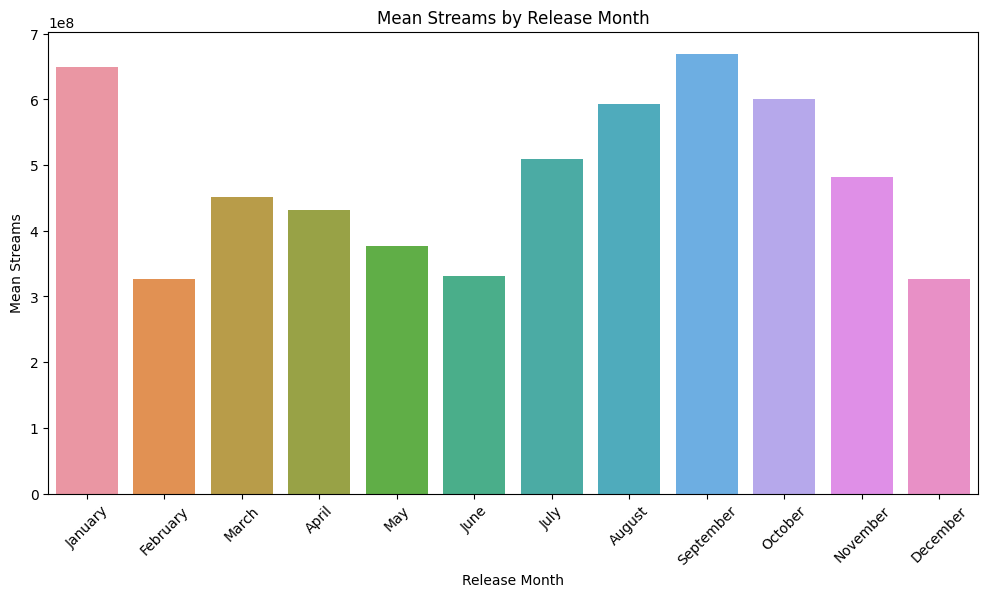

In [38]:
# Create a bar plot to visualize the mean streams for each release month with month labels.
plt.figure(figsize=(12, 6))
sns.barplot(x='released_month', y='streams', data=month_streams)
plt.xticks(range(12), month_labels, rotation=45)  # Replace numeric labels with month names
plt.xlabel('Release Month')
plt.ylabel('Mean Streams')
plt.title('Mean Streams by Release Month')
plt.show()

It appears that songs released in January, September, and August and October tend to receive more streams, whereas those released in February, December, and April tend to receive fewer streams.

In [39]:
# Group the dataset by 'released_day' and calculate the mean stream count for each day.
day_streams = df.groupby('released_day')['streams'].mean().reset_index()

In [40]:
# Sort the data by mean streams in descending order to highlight the day with the most streams.
day_streams_sorted = day_streams.sort_values(by='streams', ascending=False)

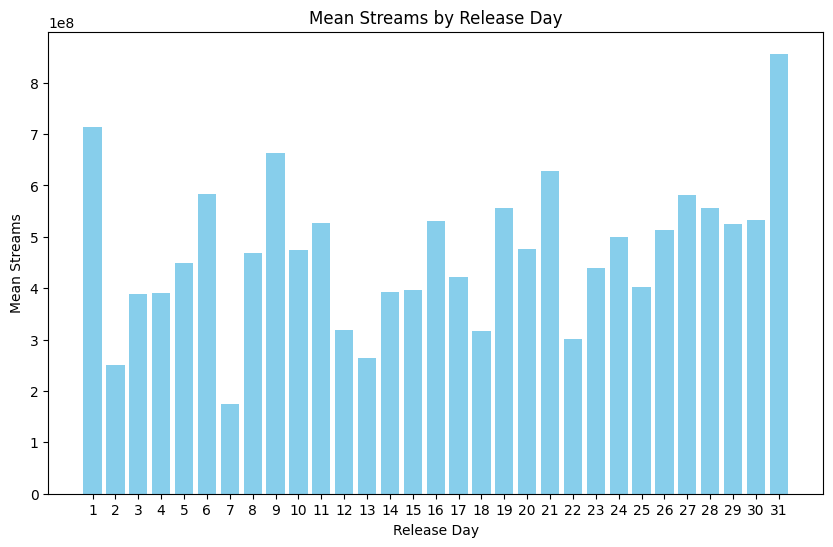

In [41]:
# Create a bar plot to visualize the mean streams for each release day.
plt.figure(figsize=(10, 6))
plt.bar(day_streams_sorted['released_day'], day_streams_sorted['streams'], color='skyblue')
plt.xlabel('Release Day')
plt.ylabel('Mean Streams')
plt.title('Mean Streams by Release Day')
plt.xticks(day_streams_sorted['released_day'])
plt.show()

The days that tend to have the highest number of streams are the 31st, 1st, and 28th, while the days with the lowest number of streams are the 7th, 2nd, and 13th.

<a name="key"></a>

## Is there any observable impact of the song's key on the number of streams it receives?

In [42]:
# Group the dataset by 'key' and calculate the mean stream count for each key.
key_streams = df.groupby('key')['streams'].mean().reset_index()

In [43]:
# Sort the keys by average streams in descending order.
key_streams = key_streams.sort_values(by='streams', ascending=False)

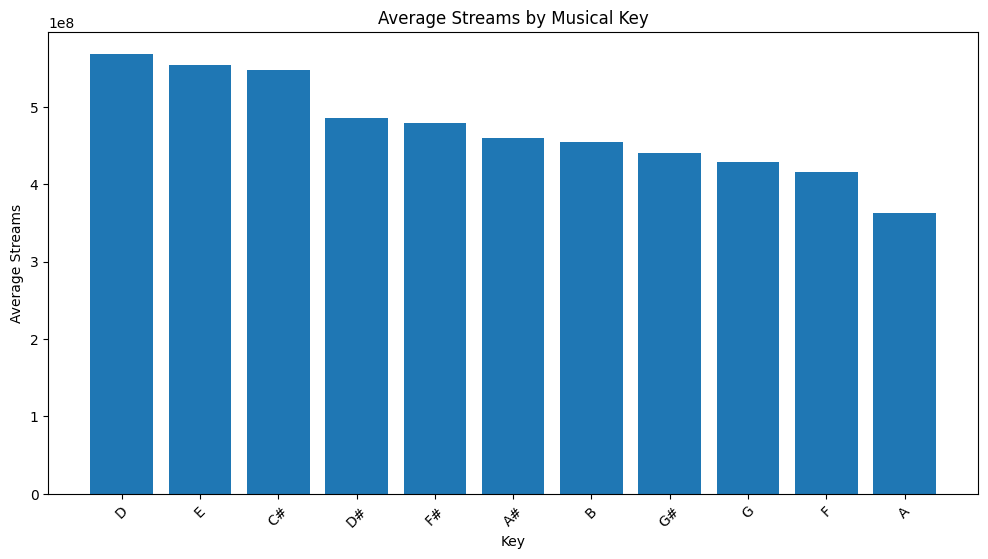

In [44]:
# Create a bar plot to visualize the average streams for each musical key.
plt.figure(figsize=(12, 6))
plt.bar(key_streams['key'], key_streams['streams'])
plt.xlabel('Key')
plt.ylabel('Average Streams')
plt.title('Average Streams by Musical Key')
plt.xticks(rotation=45)
plt.show()

While the differences are relatively small, it's noteworthy that songs in the keys of D# and C# tend to receive slightly higher stream counts, while songs in the keys of G and A receive comparatively lower streams.

<a name="bpm"></a>
## Does there exist a correlation between the tempo (BPM) of a song and the number of streams it receives?

In [45]:
# Calculate the Pearson correlation coefficient to measure the correlation between BPM and streams.
correlation = df['bpm'].corr(df['streams'])
print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: -0.0030457672203804275


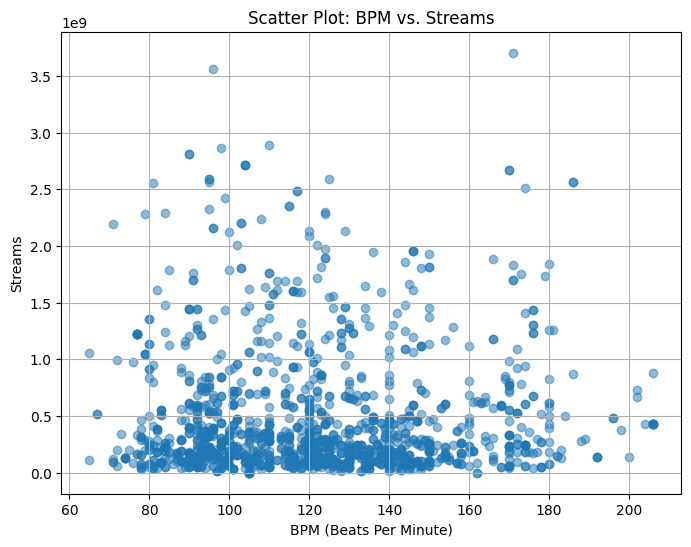

In [46]:
# Create a scatter plot to visualize the relationship between BPM and streams.
plt.figure(figsize=(8, 6))
plt.scatter(df['bpm'], df['streams'], alpha=0.5)
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Streams')
plt.title('Scatter Plot: BPM vs. Streams')
plt.grid(True)
plt.show()

The correlation coefficient is very close to zero, and as evident from the scatterplot, variations in the BPM (Beats Per Minute) of a song do not appear to have any discernible impact on the number of streams it receives.

<a name="ml"></a>
## Machine Learning Model

Now, let's proceed with the creation of a linear regression model aimed at predicting the number of streams for a song based on specific features. It's worth noting that this dataset has limitations due to its size, as it includes only the top 950 most streamed songs. Consequently, predictions may tend to be higher than in a dataset representing a broader range of songs. Nonetheless, this Jupyter notebook serves as a demonstration of data cleaning and preprocessing techniques for linear regression.

I'll outline the features we can utilize and illustrate the process of feature engineering. While 'track_name' and 'artist(s)_name' could potentially be valuable features, incorporating natural language processing (NLP) models or additional external data about artists, such as their background, nationality, or language, falls beyond the scope of this analysis.

Regarding the features 'released_year,' 'released_month,' and 'released_day,' we can improve their usability by creating a new feature that calculates the number of days since the song's release. This approach acknowledges that songs are likely to accumulate more streams over time.

However, it's important to note that the features 'in_spotify_charts,' 'in_apple_charts,' 'in_deezer_charts,' and 'in_shazam_charts' cannot be used for prediction purposes since they were added during the data collection process and not at the song's release date.

Before constructing the model, we must ensure there are no duplicate records, handle any null values, perform feature engineering, apply label encoding, and rescale the features as necessary.

<a name="duplicated"></a>
## Identifying Duplicate Records

In [47]:
# Find duplicate rows in the DataFrame
duplicates = df[df.duplicated()]

# Display the duplicate rows, if any
duplicates

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
209,Area Codes,Kaliii,2,2023,3,17,1197,13,113509496,44,...,155,C#,Major,82,51,39,2,0,9,49
503,Fingers Crossed,Lauren Spencer Smith,3,2022,1,5,2235,0,349585590,65,...,109,F,Major,60,45,47,62,0,31,5
503,Fingers Crossed,Lauren Spencer Smith,3,2022,1,5,2235,0,349585590,65,...,109,F,Major,60,45,47,62,0,31,5


In [48]:
# Drop duplicate rows from the DataFrame
df = df.drop_duplicates()

In [49]:
# Reset the index after removing duplicates
df = df.reset_index(drop=True)

<a name="missing"></a>
## Handling Missing Values

In [50]:
# Create a DataFrame to indicate null values (True for null, False for not null)
null_values = df.isnull()

In [51]:
# Count the number of null values in each column
null_counts = null_values.sum()

In [52]:
# Display the columns with null values and their respective counts
print("Columns with Null Values:")
print(null_counts[null_counts > 0])

Columns with Null Values:
in_shazam_charts     69
key                 152
dtype: int64


Given that we don't utilize the 'in_shazam_charts' feature, there's no need to fill its values. However, we will impute the missing 'key' values. One approach could involve employing a separate model to predict these null values. However, for the sake of simplicity, we'll opt to impute the missing values based on the distribution of the available data.

In [53]:
# Count the occurrences of each key in the 'key' column
key_counts = df['key'].value_counts()

In [54]:
# Sort the keys in ascending order for improved visualization
key_counts = key_counts.sort_index()

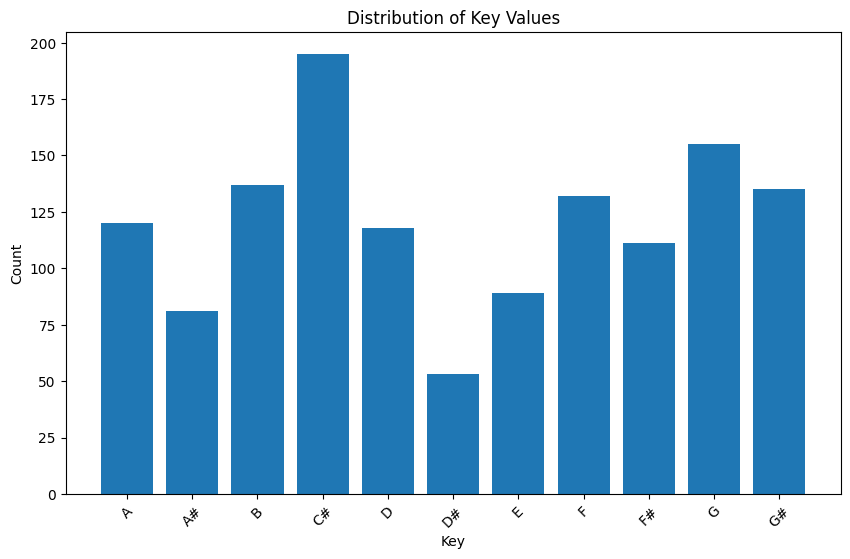

In [55]:
# Create a bar plot to visualize the distribution of key values
plt.figure(figsize=(10, 6))
plt.bar(key_counts.index, key_counts.values)
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Distribution of Key Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [56]:
# Calculate the distribution of existing "key" values as proportions
key_distribution = df['key'].value_counts(normalize=True)

In [57]:
# Determine the number of missing values in the 'key' column
num_missing = df['key'].isnull().sum()

In [58]:
# Impute missing 'key' values based on the distribution
imputed_keys = np.random.choice(key_distribution.index, size=num_missing, p=key_distribution.values)

In [59]:
# Update the DataFrame with imputed values for missing 'key' entries
df.loc[df['key'].isnull(), 'key'] = imputed_keys

<a name="outlier"></a>
## Handling Outliers

Many of our features have values within limited ranges and generally lack outliers, except for 'streams' and 'release_year.' While we won't directly use 'release_year' as a feature, we will utilize it to create new features. Therefore, it's essential to address the outliers in 'release_year.' It's worth noting that while this approach may not be the most robust way to handle outliers, it is a practical choice when employing linear regression, as outliers can potentially impact our predictions.

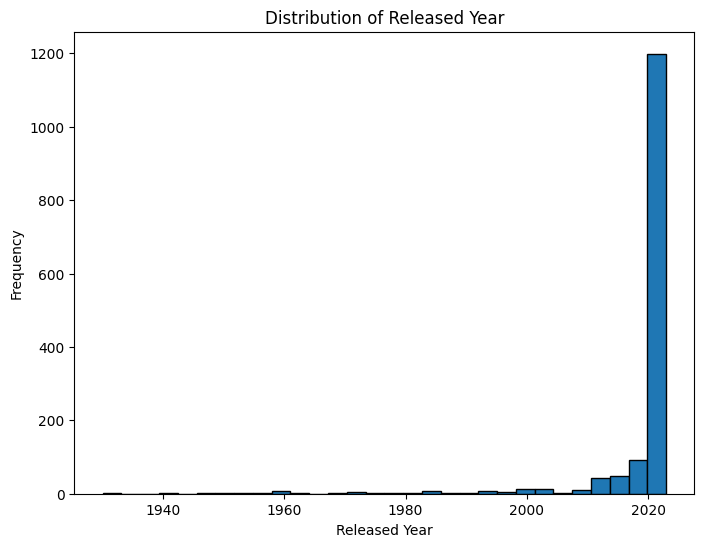

In [60]:
# Visualizing the Distribution of 'released_year' Using a Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['released_year'], bins=30, edgecolor='k')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.title('Distribution of Released Year')
plt.grid(False)
plt.show()

We initially intended to use a boxplot, but due to the extreme distribution of the data,the resulting plot appeared highly distorted and didn't effectively convey the information.


In [61]:
# Filtering the DataFrame to Select Songs Released Before 2010
songs_before_2010 = df[df['released_year'] < 2010]

In [62]:
# Calculating the Count of Songs Released Before 2010
count_before_2010 = len(songs_before_2010)

In [63]:
# Calculating the Total Number of Songs in the DataFrame
total_songs = len(df)

In [64]:
# Calculating the Percentage of Songs Released Before 2010
percentage_before_2010 = (count_before_2010 / total_songs) * 100

In [65]:
# Displaying the Results
print(f"Number of Songs Released Before 2010: {count_before_2010}")
print(f"Percentage of Total Data Represented: {percentage_before_2010:.2f}%")

Number of Songs Released Before 2010: 89
Percentage of Total Data Represented: 6.02%


In [66]:
# Filtering the DataFrame to Select Rows with 'released_year' >= 2010
df_filtered = df[df['released_year'] >= 2010]

Now, we will apply a similar approach to the 'streams' feature and remove songs that have accumulated over 2 billion streams.

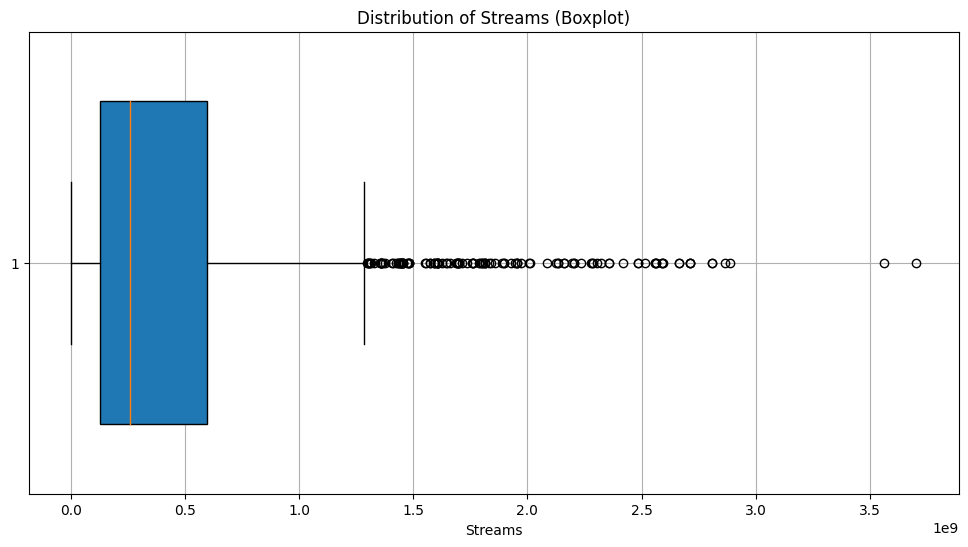

In [67]:
# Create a boxplot for 'streams'
plt.figure(figsize=(12, 6))
plt.boxplot(df['streams'], vert=False, widths=0.7, patch_artist=True)
plt.xlabel('Streams')
plt.title('Distribution of Streams (Boxplot)')
plt.grid(True)
plt.show()

In [68]:
# Filtering the DataFrame to Select Songs with 'streams' > 2 Billion
songs_above_2_billion = df[df['streams'] > 2_000_000_000]

In [69]:
# Calculating the Count of Songs with 'streams' > 2 Billion
count_above_2_billion = len(songs_above_2_billion)

In [70]:
# Calculating the Total Number of Songs in the DataFrame
total_songs = len(df)

In [71]:
# Calculating the Percentage of Songs with 'streams' > 2 Billion
percentage_above_2_billion = (count_above_2_billion / total_songs) * 100

In [72]:
# Displaying the Results
print(f"Number of Songs with Streams > 2 Billion: {count_above_2_billion}")
print(f"Percentage of Total Data Represented: {percentage_above_2_billion:.2f}%")

Number of Songs with Streams > 2 Billion: 41
Percentage of Total Data Represented: 2.77%


In [73]:
# Filtering the DataFrame to Select Rows with 'streams' <= 2 Billion
df_filtered_2 = df_filtered[df_filtered['streams'] <= 2_000_000_000]

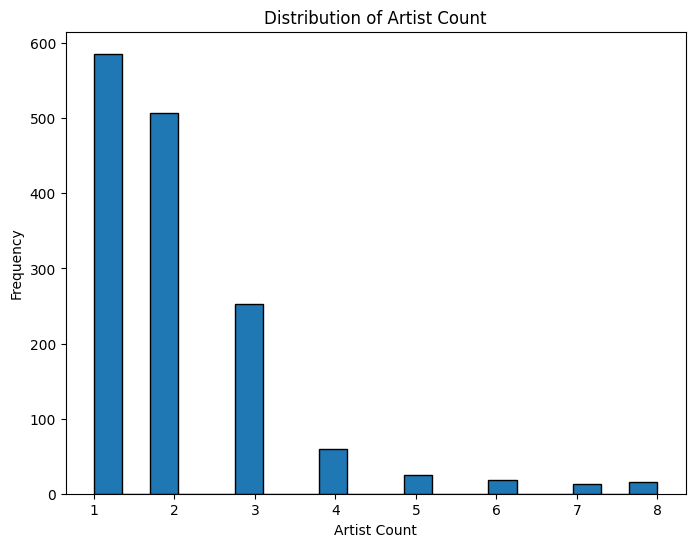

In [74]:
# Visualizing the Distribution of 'artist_count' Using a Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['artist_count'], bins=20, edgecolor='k')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')
plt.title('Distribution of Artist Count')
plt.grid(False)
plt.show()

In [75]:
# Defining a Threshold for 'artist_count'
threshold = 3

In [76]:
# Filtering the DataFrame to Select Rows with 'artist_count' > threshold
count_above_threshold = len(df[df['artist_count'] > threshold])

In [77]:
# Calculating the Total Number of Rows in the DataFrame
total_rows = len(df)

In [78]:
# Calculating the Percentage of Rows with 'artist_count' > threshold
percentage_above_threshold = (count_above_threshold / total_rows) * 100

In [79]:
# Displaying the Results
print(f"Number of Values in 'artist_count' > {threshold}: {count_above_threshold}")
print(f"Percentage of Total Data Represented: {percentage_above_threshold:.2f}%")

Number of Values in 'artist_count' > 3: 132
Percentage of Total Data Represented: 8.93%


In [80]:
# Filtering the DataFrame to Select Rows with 'artist_count' < 3
df_filtered_3 = df_filtered_2[df_filtered_2['artist_count'] < 3]

<a name="selection"></a>
## Feature Selection

Now, let's proceed to create a new DataFrame containing only the columns we want to use.

In [81]:
# Defining the List of Columns to Include in the New DataFrame
selected_columns = ['artist_count', 'released_year', 'released_month', 'released_day', 'streams',
                    'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
                    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [82]:
# Creating a New DataFrame with Only the Selected Columns
spotify_training_data = df_filtered_3[selected_columns]

<a name="multi"></a>
## Multicollinearity

Now, let's assess the presence of multicollinearity by generating a correlation matrix of the variables. If we observe a high correlation between two variables, it may be necessary to consider removing one of them.

In [83]:
# Calculate the correlation matrix
correlation_matrix = spotify_training_data[["bpm","danceability_%","valence_%","energy_%","acousticness_%","instrumentalness_%","liveness_%","speechiness_%"]].corr()

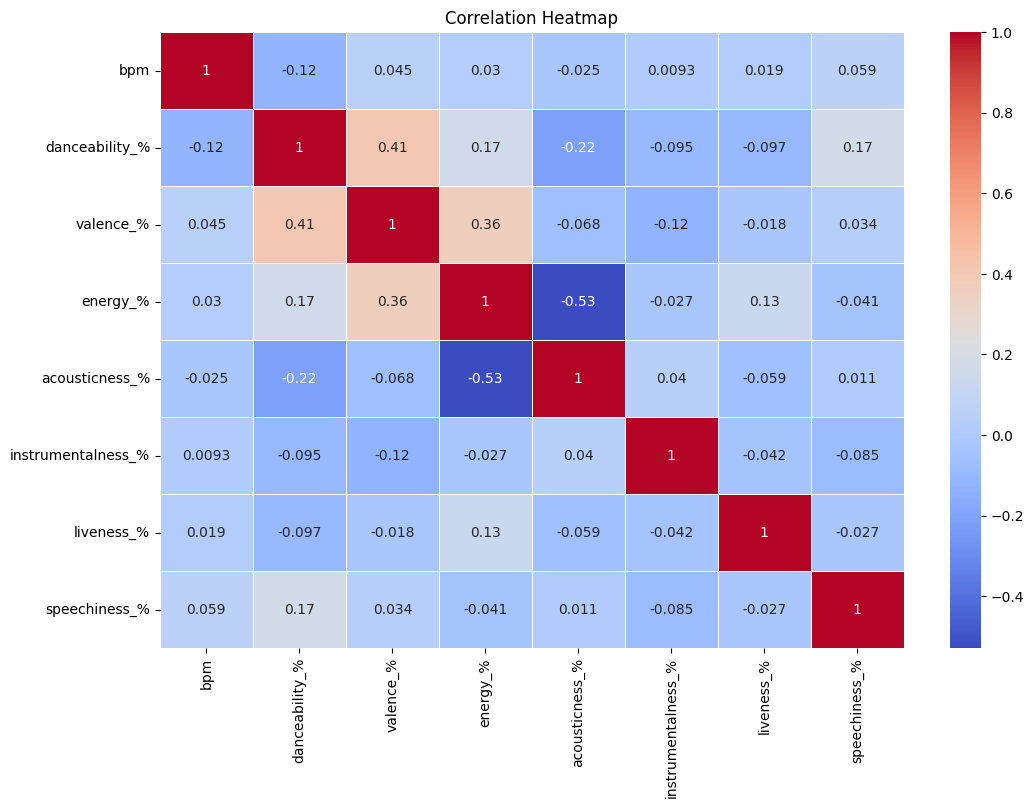

In [84]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

It appears that none of the variable pairs exhibit excessively high correlations, indicating that we can retain all of them.

<a name="engineer"></a>
## Feature Engineering

Next, we will utilize the 'released_year,' 'released_month,' and 'released_day' features to generate a new feature that calculates the number of days that have elapsed since the release of each song. It's important to note that the data was last updated on August 25th, 2023.

In [85]:
from datetime import datetime

In [86]:
# Combining 'released_year', 'released_month', and 'released_day' into a single column in 'YYYY-MM-DD' format
spotify_training_data['release_date'] = pd.to_datetime(spotify_training_data['released_year'].astype(str) + '-' + spotify_training_data['released_month'].astype(str) + '-' + spotify_training_data['released_day'].astype(str), format='%Y-%m-%d')

<ipython-input-86-2134ef67308b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_training_data['release_date'] = pd.to_datetime(spotify_training_data['released_year'].astype(str) + '-' + spotify_training_data['released_month'].astype(str) + '-' + spotify_training_data['released_day'].astype(str), format='%Y-%m-%d')


In [87]:
# Defining the date when the data was collected
today_date = datetime(2023, 8, 26)  # August 26, 2023

In [88]:
# Calculating the 'days_since_release' column
spotify_training_data['days_since_release'] = (today_date - spotify_training_data['release_date']).dt.days

<ipython-input-88-01164489b7c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_training_data['days_since_release'] = (today_date - spotify_training_data['release_date']).dt.days


In [89]:
# Dropping the intermediate 'release_date' and 'released_year' column if they are no longer needed
spotify_training_data.drop(['release_date', 'released_year'], axis=1, inplace=True)

<ipython-input-89-816fe21b3bce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_training_data.drop(['release_date', 'released_year'], axis=1, inplace=True)


Let's examine whether the new feature exhibits a stronger correlation with 'streams' compared to other variables.

In [90]:
# Calculating the correlation of all variables relative to 'streams'
correlation_to_streams = spotify_training_data.corr()['streams']

# Displaying the correlation coefficients
print(correlation_to_streams)

artist_count         -0.087624
released_month       -0.038468
released_day          0.016102
streams               1.000000
bpm                   0.054515
danceability_%       -0.053479
valence_%            -0.017438
energy_%              0.004886
acousticness_%       -0.061883
instrumentalness_%   -0.028478
liveness_%           -0.060727
speechiness_%        -0.113578
days_since_release    0.550378
Name: streams, dtype: float64


<ipython-input-90-f5cfb9615104>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_to_streams = spotify_training_data.corr()['streams']


As you can observe, the 'days_since_release' feature exhibits a higher correlation with 'streams' compared to all other variables.

<a name="encode"></a>
## Feature Encoding

In [91]:
# List of columns to one-hot encode
columns_to_one_hot = ['artist_count', 'released_month', 'released_day', 'key', 'mode']

In [92]:
# Performing one-hot encoding
spotify_training_data_encoded = pd.get_dummies(spotify_training_data, columns=columns_to_one_hot, drop_first=False)

<a name="split"></a>
## Splitting the Data

In [93]:
# Defining the target variable (y) and features (X)
y = spotify_training_data_encoded['streams']
X = spotify_training_data_encoded.drop(columns=['streams'])

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a name="scale"></a>
## Feature Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
# Creating a MinMaxScaler object
scaler = MinMaxScaler()

In [98]:
# Fitting the scaler to the training data and transforming both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Saving the scaler to a file using joblib
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Later, you can use the following line of code to load the scaler:


```
# loaded_scaler = joblib.load('scaler.pkl')
```



<a name="lr"></a>
## Linear Regression and Evaluation

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [101]:
# Creating a Linear Regression model
model = LinearRegression()

In [102]:
# Fitting the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [103]:
# Making predictions on the test data
y_pred = model.predict(X_test_scaled)

In [104]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 142436441850597472.00
Root Mean Squared Error (RMSE): 377407527.55


<a name="predict"></a>
## Predicting Expected Streams Over Time

Let's use our model to predict the expected number of streams over a 1-year period based on the provided features.

In [105]:
# Define the minimum and maximum values of 'days_since_release' in the training data
min_value = X_train['days_since_release'].min()
max_value = X_train['days_since_release'].max()

In [106]:
# Define the range of days (50 to 350)
days_range = np.arange(50, 351, 50)

In [107]:
# Calculate the scaled values for the range
scaled_values = (days_range - min_value) / (max_value - min_value)

In [108]:
# Initialize an empty list to store predictions
predictions = []

# Iterate through the scaled values
for scaled_value in scaled_values:
    # Create a copy of the example from X_train_scaled
    example = X_train_scaled[0].copy()

    # Replace the 8th feature (days_since_release) with the scaled value
    example[8] = scaled_value

    # Make a prediction for the modified example
    prediction = model.predict([example])

    # Append the prediction to the list
    predictions.append(prediction[0])  # Assuming prediction is a 1D array

predictions = np.array(predictions)

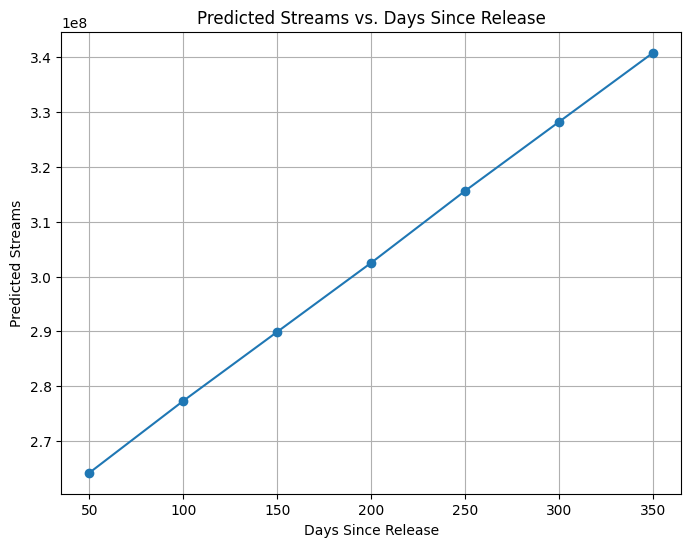

In [109]:
# Create a line plot to visualize predicted streams over time
plt.figure(figsize=(8, 6))
plt.plot(days_range, predictions, marker='o')
plt.xlabel('Days Since Release')
plt.ylabel('Predicted Streams')
plt.title('Predicted Streams vs. Days Since Release')
plt.grid(True)
plt.show()

In an ideal scenario with a larger and more diverse dataset, this type of model could be a valuable tool for estimating the number of streams a song might receive and for identifying the key features that contribute to a song's success.

<a name="conclusion"></a>
# Conclusion
We embarked on a data analysis journey, starting with the acquisition of data from Kaggle. Throughout our exploration, we sought answers to pressing questions about the most streamed songs and artists, as well as the optimal timing for music releases, be it a specific day or month.

Despite our extensive investigation, we uncovered limited correlation between the key and beats per minute (bpm) of songs and their respective stream counts. However, we meticulously preprocessed the data, paving the way for the development of a machine learning model capable of delivering stream count estimations based on song features.

It's crucial to bear in mind that our dataset, while insightful, possesses limitations due to its size. Yet, the methodologies and code employed here stand ready to extract richer insights and construct more accurate machine learning models when applied to larger, more comprehensive datasets. With this foundation, we can look forward to uncovering deeper music industry insights in the future.